In [30]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

In [31]:
# NBA season we will be analyzing
year = 2019

In [32]:
# URL page we will scraping (see image above)
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [55]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers
headers2= headers[5:]
headers2

['GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [34]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [35]:
stats = pd.DataFrame(player_stats, columns = headers)
stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
5,Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,.306,...,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,.300,...,.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,.519,...,.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
8,Rawle Alkins,SG,21,CHI,10,1,12.0,1.3,3.9,.333,...,.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
9,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,.376,...,.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6


In [36]:
stats['PTS'].unique()

array(['5.3', '1.7', '3.2', '13.9', '8.9', '1.0', '21.3', '3.7', '5.6',
       '10.9', '9.9', '9.4', '8.0', '2.5', '0.7', '0.0', '27.7', '13.4',
       None, '7.0', '6.7', '12.5', '14.1', '11.7', '16.3', '7.3', '14.9',
       '0.9', '1.3', '1.9', '6.2', '16.4', '17.7', '14.3', '11.5', '5.0',
       '9.3', '6.1', '11.6', '25.6', '11.3', '10.5', '3.3', '8.4', '2.8',
       '7.6', '4.8', '4.4', '9.6', '15.9', '4.2', '18.0', '3.5', '4.7',
       '26.6', '8.2', '16.1', '5.7', '4.9', '4.1', '8.3', '7.5', '4.0',
       '15.6', '6.6', '4.3', '13.0', '2.1', '6.4', '12.1', '11.8', '9.7',
       '8.8', '2.6', '18.7', '18.2', '2.3', '11.4', '6.0', '1.5', '16.6',
       '11.1', '7.4', '10.3', '5.4', '9.2', '6.3', '11.9', '0.8', '3.1',
       '2.0', '1.8', '2.9', '16.8', '19.5', '11.2', '21.1', '6.9', '13.3',
       '14.5', '7.9', '3.8', '3.0', '27.3', '25.9', '5.8', '10.8', '5.9',
       '7.1', '21.2', '9.8', '10.7', '13.7', '17.3', '26.0', '12.0',
       '27.5', '10.2', '10.4', '5.1', '12.9', '15.

In [37]:
stats.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

In [38]:
#for i in headers2:
stats['PTS'] = stats['PTS'].astype('float64')

In [39]:
stats['PTS'].dtypes


dtype('float64')

In [40]:
#stats['PTS'].unique()

In [41]:
stats[stats['PTS'] >=25].head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,.578,...,.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
48,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,.475,...,.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
71,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,.467,...,.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
165,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
167,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,.517,...,.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
198,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,.521,...,.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0
207,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,.484,...,.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
249,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,.438,...,.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
277,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,.442,...,.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
344,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,.510,...,.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4


In [42]:
stats_top=stats[stats['PTS']>=25]

In [43]:
stats_top.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,.578,...,.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
48,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,.475,...,.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
71,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,.467,...,.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
165,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
167,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,.517,...,.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9


Text(0, 0.5, 'PTS')

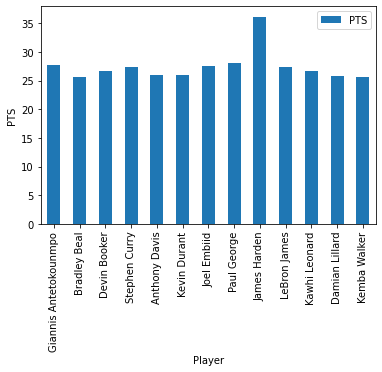

In [44]:
#CamdenPrices = df[df['London_Borough'] == 'Camden']
ax = stats_top.plot(kind ='bar', x = 'Player', y='PTS')
ax.set_ylabel('PTS')

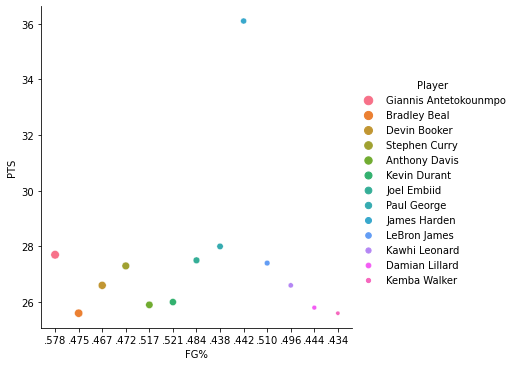

In [45]:
sns.relplot(x='FG%', y='PTS', data=stats_top, kind='scatter', size='Player', hue='Player')
plt.show()

In [51]:
stats['AST']=stats['AST'].astype('float64')

In [52]:
assist_top=stats[stats['AST']>=7]

Text(0, 0.5, 'PTS')

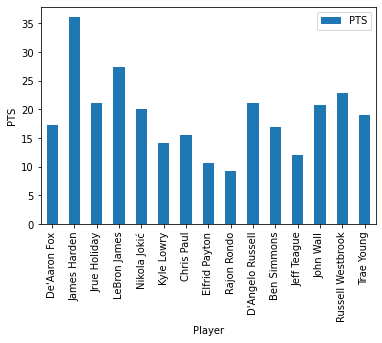

In [53]:
ax = assist_top.plot(kind ='bar', x = 'Player', y='PTS')
ax.set_ylabel('PTS')

In [54]:
plt.scatter(x='Play', y='PTS', )
ax.set_ylabel('PTS')

TypeError: unhashable type: 'numpy.ndarray'